In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go 
import plotly.express as px
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# loading the dfset 
data = pd.read_csv('/config/workspace/hypothyroid.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [5]:
print(f"shape of the dfset:{df.shape}")

shape of the dfset:(3772, 30)


In [6]:
# info about the dfset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Although the df description suggests that there are no missing values, the dfset actually contains missing values which are represented by invalid values like '?'. To address this issue, we can replace such values with 'nan'

In [7]:
# Loop through each column in the df
for column in df.columns:
    # Count the number of missing values (represented by '?') in the current column
    count = df[column][df[column]=='?'].count()
    # If there are missing values, print the column name and the count of missing values
    if count!=0:
        print(column, df[column][df[column]=='?'].count())


age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


We can also observe that all the values for the 'TBG' column are missing. As such, we will drop this column since it does not provide any useful information.

In [8]:
df['TBG'].unique()

array(['?'], dtype=object)

In [9]:
df.drop('TBG', axis=1,inplace=True)

In [10]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

Looking to the dfset some columns in the dfset contain true and false values that indicate whether the next column has values or not. Additionally, upon examining the dfset, we can see this pattern in several columns.

In [11]:
df[['TSH_measured', 'TSH',
        'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
        'FTI_measured', 'FTI', 'TBG_measured']]

,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,t,1.3,t,2.5,t,125,t,1.14,t,109,f
1,t,4.1,t,2,t,102,f,?,f,?,f
2,t,0.98,f,?,t,109,t,0.91,t,120,f
3,t,0.16,t,1.9,t,175,f,?,f,?,f
4,t,0.72,t,1.2,t,61,t,0.87,t,70,f
...,...,...,...,...,...,...,...,...,...,...,...
3767,f,?,f,?,f,?,f,?,f,?,f
3768,t,1,t,2.1,t,124,t,1.08,t,114,f
3769,t,5.1,t,1.8,t,112,t,1.07,t,105,f
3770,t,0.7,t,2,t,82,t,0.94,t,87,f


droping extra columns

In [12]:
df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'], axis=1)

In [13]:
# Loop through each column in the df
for column in df.columns:
    # Count the number of missing values (represented by '?') in the current column
    count = df[column][df[column]=='?'].count()
    # If there are missing values, replace them with numpy nan
    if count!=0:
        df[column] = df[column].replace('?',np.nan)


In [14]:
# again the count the '?' in columns
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, df[column][df[column]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Check the missing values in the dataset

In [15]:
df.isna().sum().sort_values(ascending=False)

T3                           769
T4U                          387
FTI                          385
TSH                          369
TT4                          231
sex                          150
age                            1
goitre                         0
referral_source                0
psych                          0
hypopituitary                  0
tumor                          0
lithium                        0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
Class                          0
dtype: int64

drop the rows with missing values in age and sex

In [16]:
df = df.dropna(subset=['age','sex'])
df.isna().sum().sort_values(ascending=False)

T3                           745
T4U                          367
FTI                          365
TSH                          352
TT4                          217
age                            0
goitre                         0
referral_source                0
psych                          0
hypopituitary                  0
tumor                          0
lithium                        0
sex                            0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
Class                          0
dtype: int64

In [17]:
pd.options.display.max_columns = None

In [18]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,SVI,negative


In [19]:
df['age'].unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '63', '51', '81', '54', '55', '60', '25', '73',
       '34', '78', '37', '85', '26', '58', '64', '44', '48', '61', '35',
       '83', '87', '53', '77', '27', '69', '74', '76', '36', '22', '43',
       '72', '82', '31', '39', '49', '62', '57', '50', '30', '29', '75',
       '19', '7', '79', '38', '17', '21', '24', '42', '15', '45', '32',
       '47', '1', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '93', '92'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3621 non-null   object
 1   sex                        3621 non-null   object
 2   on_thyroxine               3621 non-null   object
 3   query_on_thyroxine         3621 non-null   object
 4   on_antithyroid_medication  3621 non-null   object
 5   sick                       3621 non-null   object
 6   pregnant                   3621 non-null   object
 7   thyroid_surgery            3621 non-null   object
 8   I131_treatment             3621 non-null   object
 9   query_hypothyroid          3621 non-null   object
 10  query_hyperthyroid         3621 non-null   object
 11  lithium                    3621 non-null   object
 12  goitre                     3621 non-null   object
 13  tumor                      3621 non-null   object
 14  hypopitu

In [21]:
numeric_columns = ["age","TSH","T3","TT4","T4U","FTI"]

In [22]:
df[numeric_columns] = df[numeric_columns].astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3621 non-null   float64
 1   sex                        3621 non-null   object 
 2   on_thyroxine               3621 non-null   object 
 3   query_on_thyroxine         3621 non-null   object 
 4   on_antithyroid_medication  3621 non-null   object 
 5   sick                       3621 non-null   object 
 6   pregnant                   3621 non-null   object 
 7   thyroid_surgery            3621 non-null   object 
 8   I131_treatment             3621 non-null   object 
 9   query_hypothyroid          3621 non-null   object 
 10  query_hyperthyroid         3621 non-null   object 
 11  lithium                    3621 non-null   object 
 12  goitre                     3621 non-null   object 
 13  tumor                      3621 non-null   objec

In [24]:
# the age of person can't be 455
df.drop(df[df['age']==455].index, inplace=True)

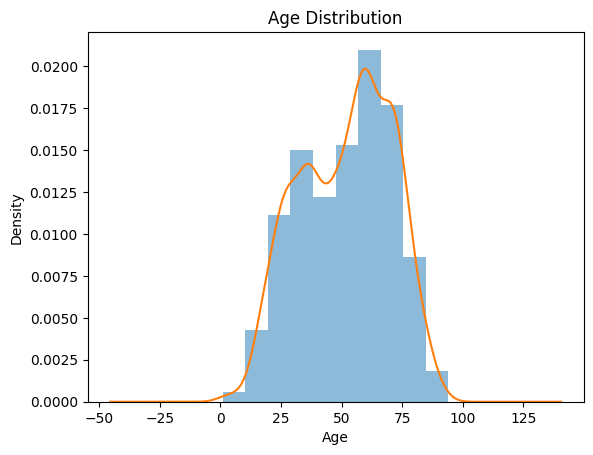

In [25]:
ax = df['age'].plot.hist(bins=10, alpha=0.5, density=True)
df['age'].plot.kde(ax=ax)


plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()


In [26]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [27]:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [28]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41.0,0,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,0,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,1,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,0,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,0,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative


In [29]:
# # We can map the categorical values like below:
# df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for column in df.columns[~df.columns.isin(['sex'])]:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories. 

In [30]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,SVI,negative


In [31]:
df['referral_source']

0        SVHC
1       other
2       other
3       other
4         SVI
        ...  
3767    other
3768      SVI
3769    other
3770      SVI
3771    other
Name: referral_source, Length: 3620, dtype: object

In [32]:
# we will use get_dummies with that.
df = pd.get_dummies(df, columns=['referral_source'])

In [33]:
# Now our ouptut class also has 4 distinct categories. There is no sense of using get dummies with our Output class, so we will just map them.
# Let's use LabelEncoder function for this.
df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [34]:
lblEn = LabelEncoder()

df['Class'] =lblEn.fit_transform(df['Class'])

In [35]:
df['sex'].unique()

array([0, 1])

In [36]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1,0,1,0,0,0
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN,1,0,0,0,0,1
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0,1,0,0,0,0,1
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN,1,0,0,0,0,1
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1,0,0,0,1,0


In [40]:
df.isna().sum().sort_values(ascending=False)

T3                           745
T4U                          367
FTI                          365
TSH                          352
TT4                          217
age                            0
hypopituitary                  0
referral_source_SVI            0
referral_source_SVHD           0
referral_source_SVHC           0
referral_source_STMW           0
Class                          0
psych                          0
tumor                          0
sex                            0
goitre                         0
lithium                        0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
referral_source_other          0
dtype: int64

In [41]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [42]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

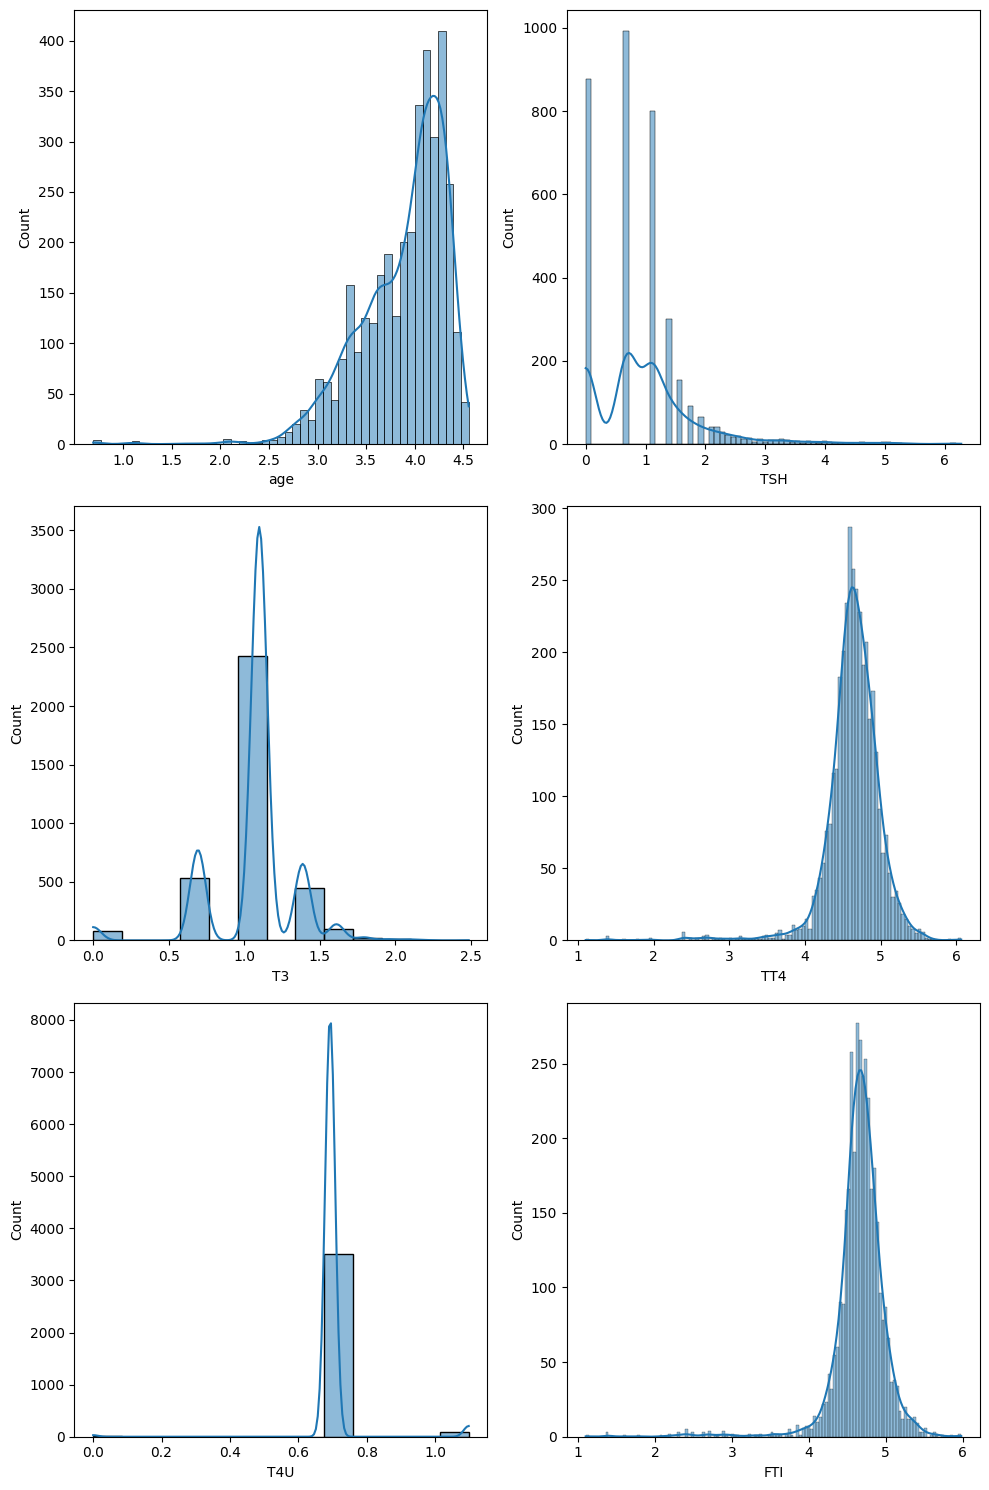

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15), facecolor='white')
plotnumber = 0

for ax, column in zip(axes.flatten(), columns):
    new_data[column] += 1
    sns.histplot(np.log(new_data[column]), ax=ax, kde=True)
    ax.set_xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [69]:
new_data = new_data.drop(['TSH'],axis=1)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'Class', 'referral_source_STMW', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_other'],
      dtype='object')

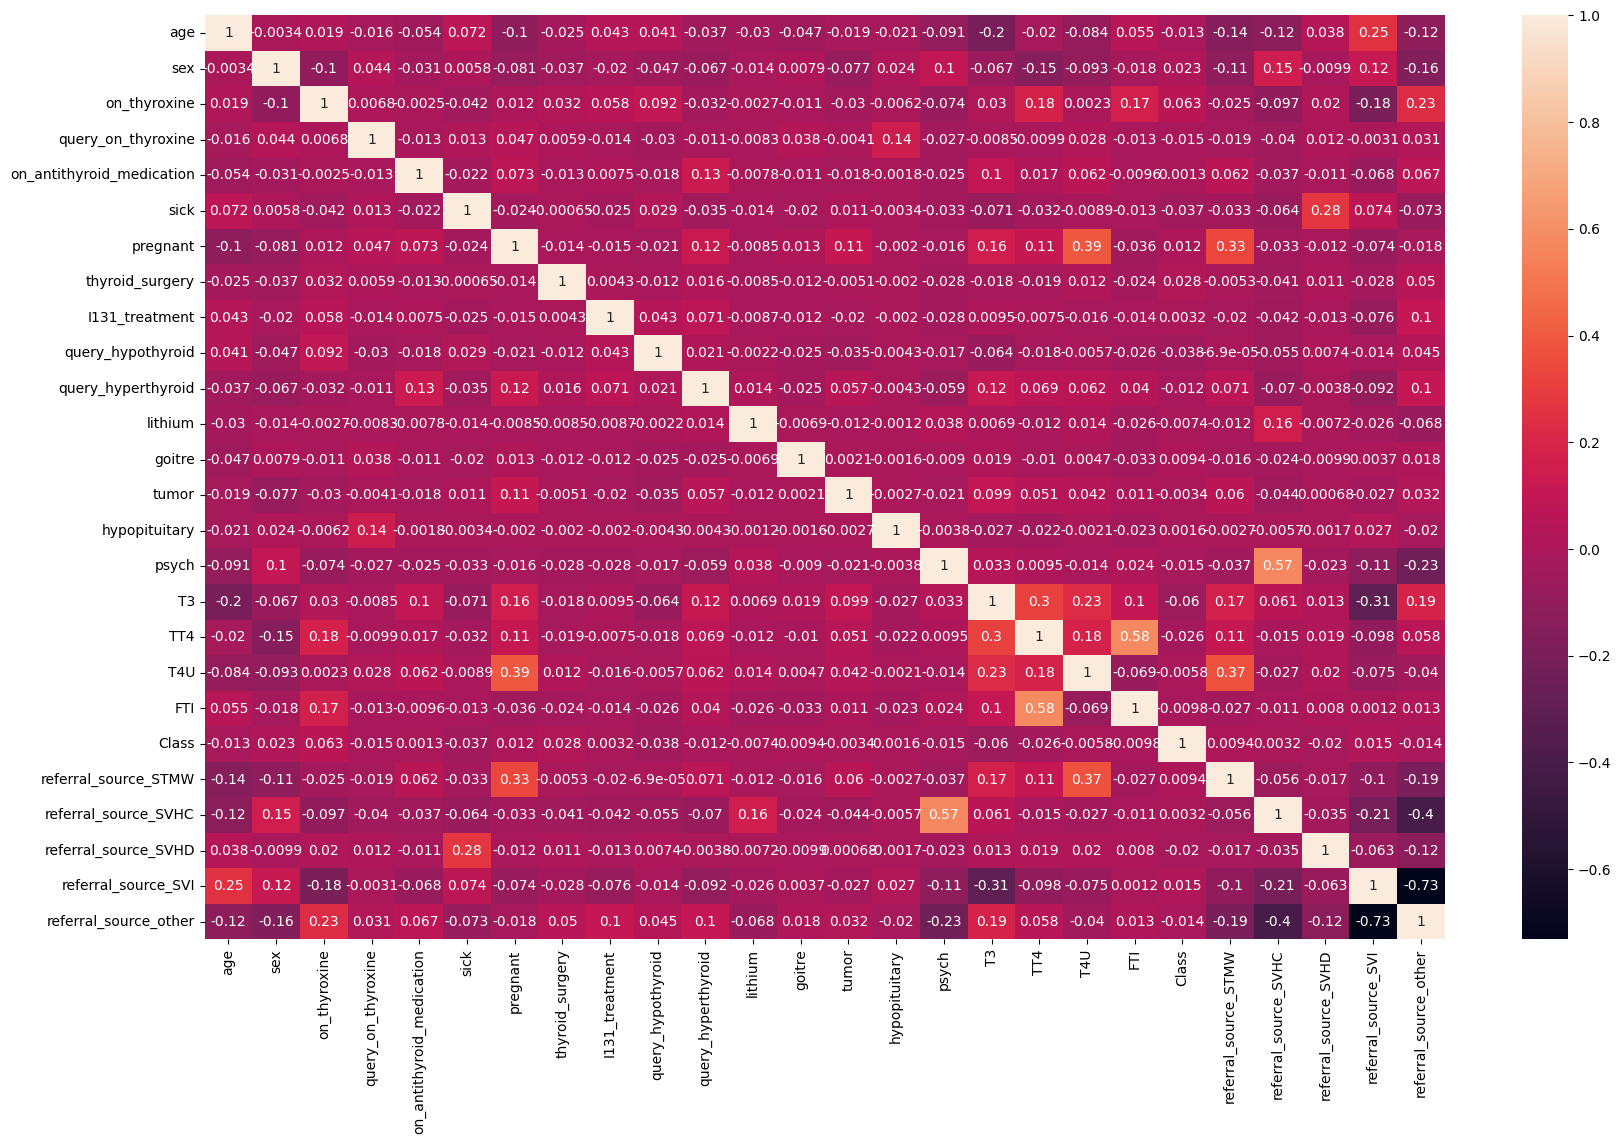

In [104]:
# Calculate the Kendall rank correlation matrix of the encoded DataFrame
corr = new_data.corr(method='kendall')

# Set the size of the figure for the heatmap
plt.figure(figsize=(20,12))

# Create a heatmap of the Kendall rank correlation matrix using the seaborn library
sns.heatmap(corr, annot=True)

# list of columns
new_data.columns

0.0    2478
1.0    1142
Name: sex, dtype: int64


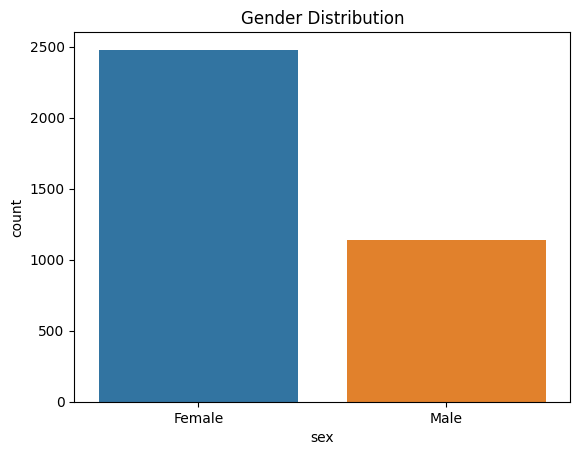

In [101]:
print(new_data['sex'].value_counts())
ax = sns.countplot(x='sex',data=new_data)
ax.set(title='Gender Distribution')
ax.set_xticklabels(['Female', 'Male' ])
plt.show()


<Axes: xlabel='Class', ylabel='count'>

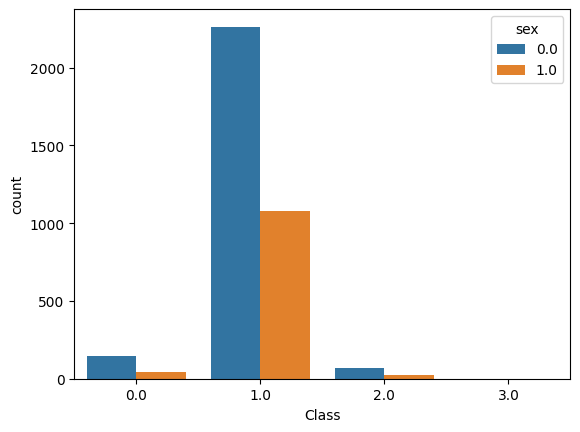

In [105]:
sns.countplot(data = new_data, x='Class', hue='sex')

<Axes: xlabel='Class', ylabel='count'>

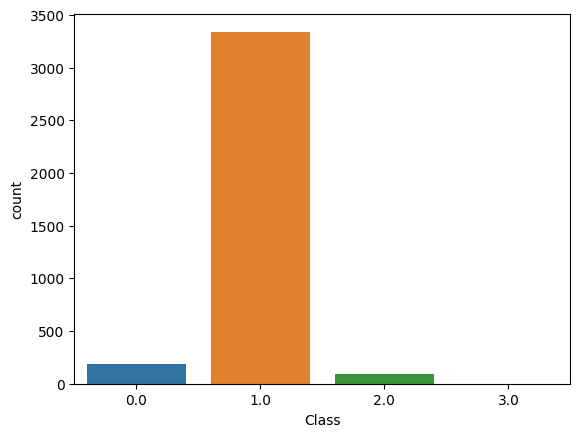

In [70]:
sns.countplot(data = new_data, x='Class')

In [71]:
# spliting input features and target feature
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']

In [72]:
# balancing the dataset
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x, y)

In [73]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,147.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0


In [79]:
x_sampled.shape

(13360, 25)

<Axes: xlabel='Class', ylabel='count'>

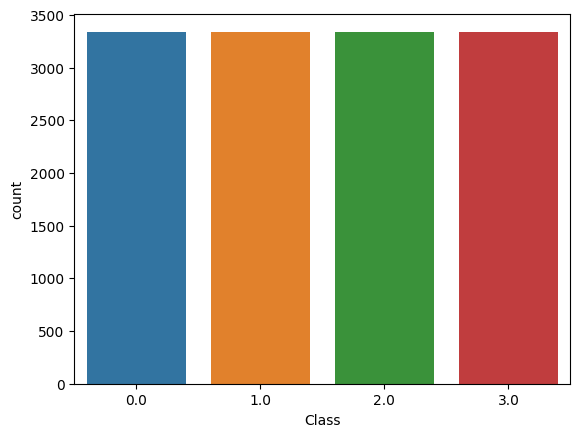

In [78]:
sns.countplot(x=y_sampled)